# [RETO] Regresión

Os animamos a que realicéis este ejercicio inspirado en el proyecto indicado por Aemet. En nuestro caso emplearemos como fuente de datos un repositorio abierto, el de la universidad de Irvine: 
Repositorio: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

Deberemos analizar y transformar los datos buscando un buen predictor para la variable de área afectada. 

Dado que se trata de una serie con gran cantidad de ceros (por suerte) nos recomiendan emplear una transformación logarítmica de los datos.

Transformación del logaritmo: https://www.cuemath.com/algebra/log-to-exponential-form/

Veamos qué se os ocurre.

# Atributos del Conjunto de Datos

**X:** Coordenada x del mapa del parque Montesinho (1 a 9).

**Y:** Coordenada y del mapa del parque Montesinho (2 a 9).

**month:** Mes del año (de "jan" a "dec").

**day:** Día de la semana (de "mon" a "sun").

**FFMC:** Índice de combustible fino (18.7 a 96.20).

**DMC:** Código de humedad del duff (1.1 a 291.3).

**DC:** Índice de sequía (7.9 a 860.6).

**ISI:** Índice de inflamabilidad (0.0 a 56.10).

**temp:** Temperatura en grados Celsius (2.2 a 33.30).

**RH:** Humedad relativa en % (15.0 a 100).

**wind:** Velocidad del viento en km/h (0.40 a 9.40).

**rain:** Lluvia en mm/m2 (0.0 a 6.4).

**area:** Área quemada del bosque (en hectáreas, de 0.00 a 1090.84). Este es el atributo objetivo que queremos predecir.

In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
# loading csv data to dataframe 
#df = pd.read_csv('forestfires.csv')
# checking out the Data



In [3]:
# Cargar el conjunto de datos desde la web
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
#checking columns and total records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Describimos el conjunto de datos para conocer estadísticas base, datos faltantes, etc.

In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
corr = df.corr(numeric_only=True)
corr

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


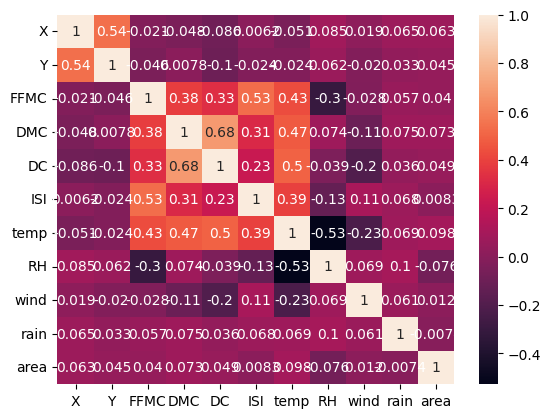

In [8]:
sns.heatmap(corr, annot=True);

In [9]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

## **Analisis exploratorio de datos**


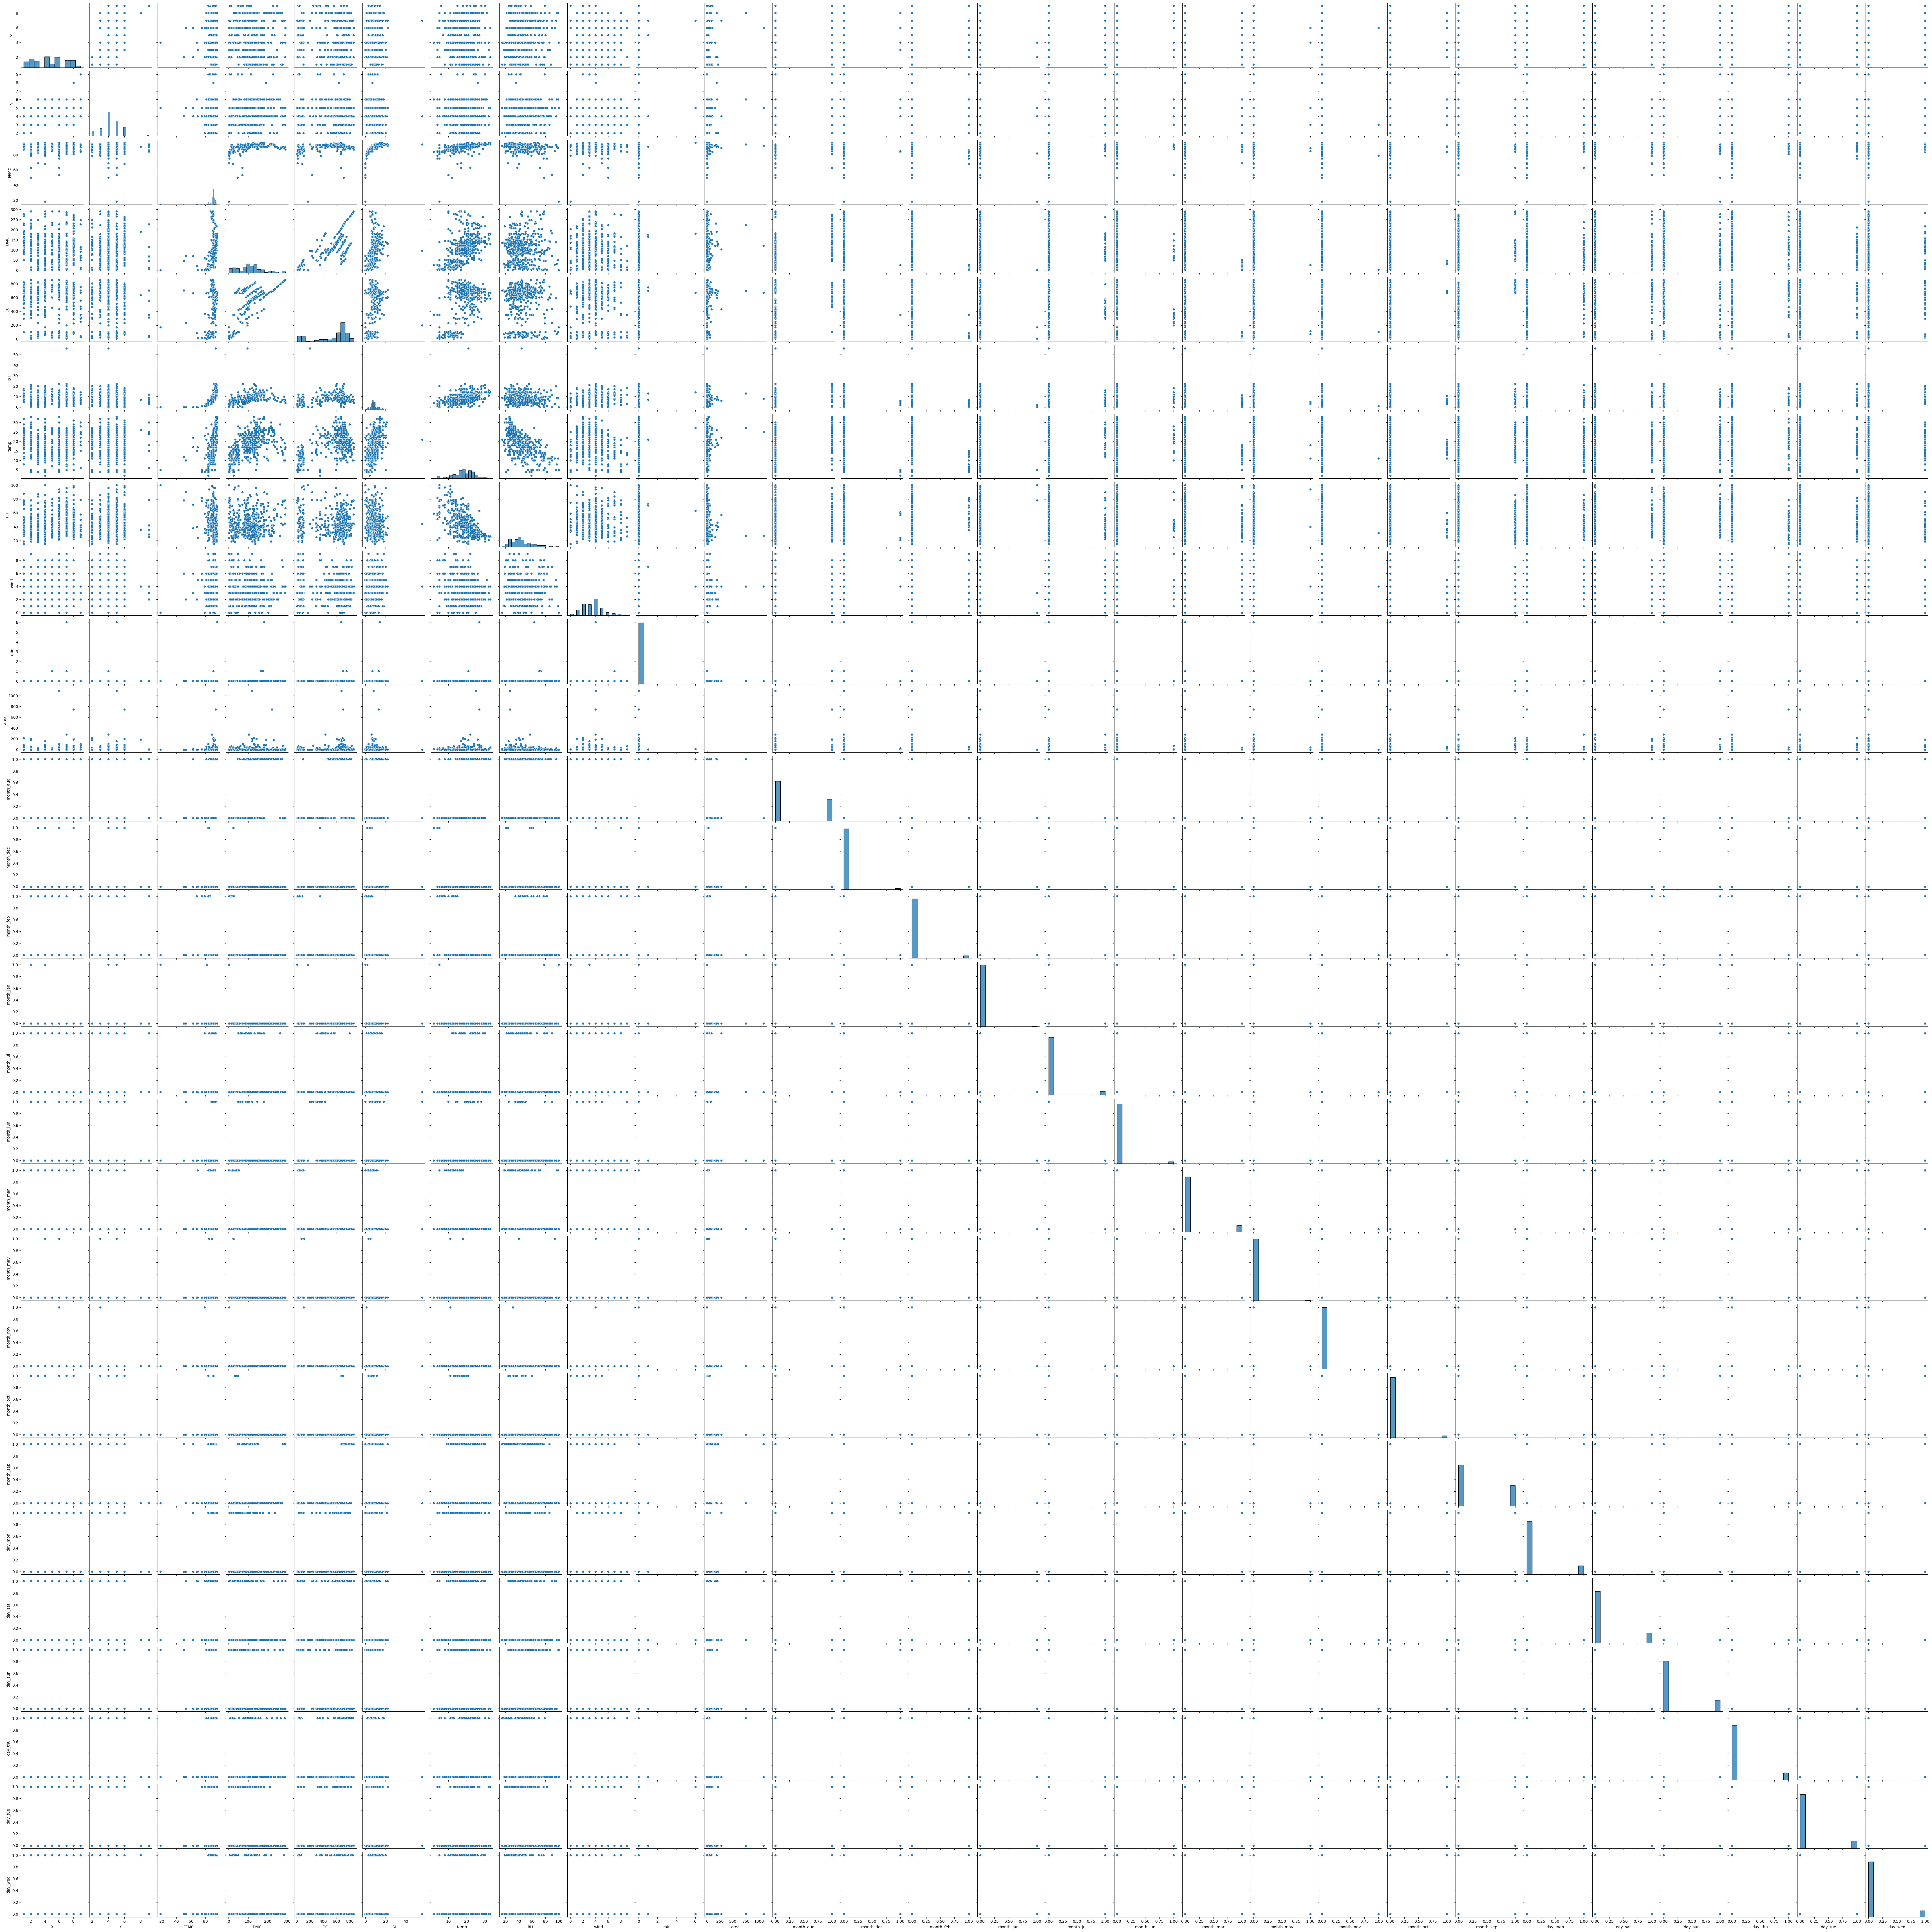

In [33]:
#Visualizamos por pares**

sns.pairplot(df);

In [11]:
# Transformar los datos categóricos (mes y día) a variables dummy
df = pd.get_dummies(df, columns=['month', 'day'], drop_first=1)
df = df.astype(int)
# 

In [12]:

df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86,26,94,5,8,51,6,0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90,35,669,6,18,33,0,0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90,43,686,6,14,33,1,0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91,33,77,9,8,97,4,0,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89,51,102,9,11,99,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81,56,665,1,27,32,2,0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81,56,665,1,21,71,5,0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81,56,665,1,21,70,6,0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94,146,614,11,25,42,4,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
df.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

In [14]:
# Divide el conjunto de datos en _train_ y _test_
features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed']

target = 'area'

In [15]:
X = df[features]
X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86,26,94,5,8,51,6,0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90,35,669,6,18,33,0,0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90,43,686,6,14,33,1,0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91,33,77,9,8,97,4,0,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89,51,102,9,11,99,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81,56,665,1,27,32,2,0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81,56,665,1,21,71,5,0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81,56,665,1,21,70,6,0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94,146,614,11,25,42,4,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
Y = np.log1p(df[target])
Y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    1.945910
513    4.007333
514    2.484907
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [18]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (517, 28)
Train features shape: (361, 28)
Train target shape: (361,)
Test features shape: (156, 28)
Test target shape: (156,)


In [19]:
#Entrena un modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Analiza los coeficientes.

In [20]:
lm.score(X_test, y_test)

-0.1738356238100871

In [21]:
lm.score(X_train, y_train)

0.4056833240192175

In [22]:
print(lm.intercept_)

-1.6318302510837266


In [23]:
print(lm.coef_)

[ 1.78122547e-02  1.40303066e-02  1.53488042e-02  1.63020638e-03
 -7.30029011e-04 -7.09637696e-03  2.03902488e-02  9.00826564e-03
  3.46124974e-02  1.32033739e-01  1.68097841e-02  5.11662657e-02
  1.90072006e+00  2.30814517e-01  3.74458982e-01 -9.15550511e-03
 -4.57364353e-02  7.01088840e-02  2.35945034e+00 -4.96470909e-01
  3.46192809e-01  6.11755511e-01  1.75487383e-01  1.66647782e-01
 -3.98808120e-02 -1.08063663e-01  2.04371052e-01 -5.57851083e-02]


In [24]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
X,0.017812
Y,0.014030
FFMC,0.015349
DMC,0.001630
DC,-0.000730
ISI,-0.007096
temp,0.020390
RH,0.009008
wind,0.034612
rain,0.132034


Evaluar visualmente el modelo.

In [25]:
X_test

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
304,6,5,85,28,113,3,11,94,4,0,...,1,0,0,0,0,1,0,0,0,0
501,7,5,96,181,671,14,21,65,4,0,...,0,0,0,0,0,0,0,0,1,0
441,8,6,92,207,672,8,25,29,1,0,...,0,0,0,0,1,0,0,0,0,0
153,5,4,94,85,692,15,20,47,4,0,...,0,0,0,1,0,0,0,0,0,0
503,2,4,94,139,689,20,29,30,4,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2,2,94,108,647,17,24,22,4,0,...,0,0,0,0,0,0,0,0,1,0
66,2,2,92,117,668,12,23,37,4,0,...,0,0,0,1,0,0,0,0,0,0
286,7,6,91,183,437,12,12,90,7,0,...,0,0,0,0,0,0,0,0,0,1
422,8,6,88,263,795,5,29,27,3,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
predictions = lm.predict(X_test)
predictions

array([ 3.52732436,  1.15008068,  0.84611368,  1.0812904 ,  0.49659035,
        0.80755356,  1.3577546 ,  0.34365909,  1.03028139,  0.69227199,
        0.56271334,  1.02331167,  0.65707697,  0.33161691,  1.38606688,
        0.79188716,  0.50055569,  0.9284112 ,  0.71268459,  0.77281967,
        1.45343545,  1.22186323,  2.72520097,  1.39870693,  1.07010315,
        0.54032005,  0.95693068,  0.72149525,  1.04996035,  0.65473814,
        0.7608939 ,  1.36014616,  1.11164261,  1.28508971,  0.65265486,
        0.8383973 ,  0.58150757,  1.89474956,  0.71955911,  0.44503003,
        0.62498934,  0.96598109,  0.38719966,  0.87732201,  0.7784813 ,
        0.68255228,  0.89866562,  1.69266551,  0.76405163,  0.80804836,
        0.77860557, 19.59822649,  1.10380064,  0.2569993 ,  1.29565568,
        0.69006532,  0.58727919,  0.82206602,  1.18958628,  1.33359184,
        0.40018329,  0.70737054,  0.64459089,  0.66035866,  0.56411695,
        0.77432724,  0.83597417,  0.72818733,  1.75582978,  0.72

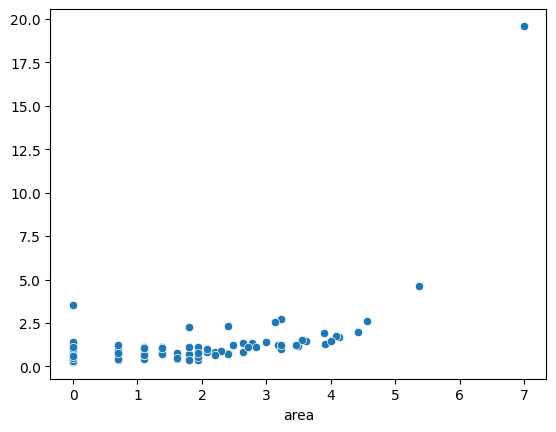

In [27]:
sns.scatterplot(x = y_test, y = predictions);

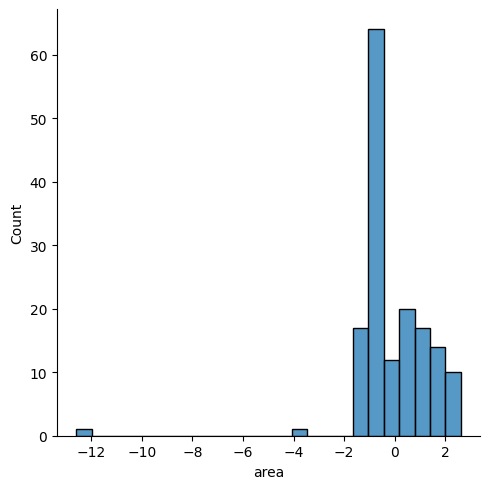

In [28]:
sns.displot((y_test - predictions));

Obtener las métricas de error relevantes para este modelo.

In [29]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.035581106742598
MSE: 2.285393810641589
RMSE: 1.5117519011536216


In [30]:
lm.score(X_train, y_train)

0.4056833240192175